# Assignment: Linear Models
## Foundations of Machine Learning
## Do Q1 and one other question

**Q0.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
A model is considered linear if it is linear in its parameters (coefficients). Specifically, a model is linear if the relationship between the independent variables 
and the dependent variable can be expressed as a linear combination of the features. It is "Linear in relationship". 

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
The coefficient for a dummy/one-hot-encoded variable indicates the change in the dependent variable Y for that category relative to the reference category.
The interpretation hinges on the intercept, which gives the predicted outcome for the reference category. All dummy variable coefficients reflect differences from that baseline.
3. Can linear regression be used for classification? Explain why, or why not.
Linear regression is not ideal for classification because it is designed for continuous outcomes, not categorical ones. You can use a threshold to convert the continuous 
predictions of linear regression to categorical predictions. However, this is suboptimal because there is not equal variance using this prediction. 
4. What are signs that your linear model is over-fitting?
If the model has a high accuracy or low error on the training data but performs poorly on unseen data, it is likely overfitting. Adding unnecessary features or features that are highly correlated with others can lead to a model that fits the noise in the training data rather than the true underlying pattern.
5. Clearly explain multi-colinearity using the two-stage least squares technique.
Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to estimate the individual effect of each variable. This causes issues with the precision of coefficient estimates and can inflate standard errors, leading to unreliable statistical inferences. The 2SLS first regresses the problematic independent variable on the non-collinear variables. Then using the predicted values from the problematic variable you can reduce uncorrelated error. 
6. What are two ways to incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$?
Add polynomial terms to the model to capture nonlinear relationships or apply transformations such as logarithms, square roots, or exponentials to the variables to capture nonlinear effects.
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
he intercept represents the predicted value of the dependent variable y when all the independent variables x<i>=0. The coefficient of a dummy variable represents the difference in the predicted value of y and between the reference category (baseline) and the category represented by the dummy variable.

**Q1.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

Most expensive borough:
Neighbourhood            Manhattan
Average_Price           183.664286
Average_Review_Score     91.801496
Name: 2, dtype: object


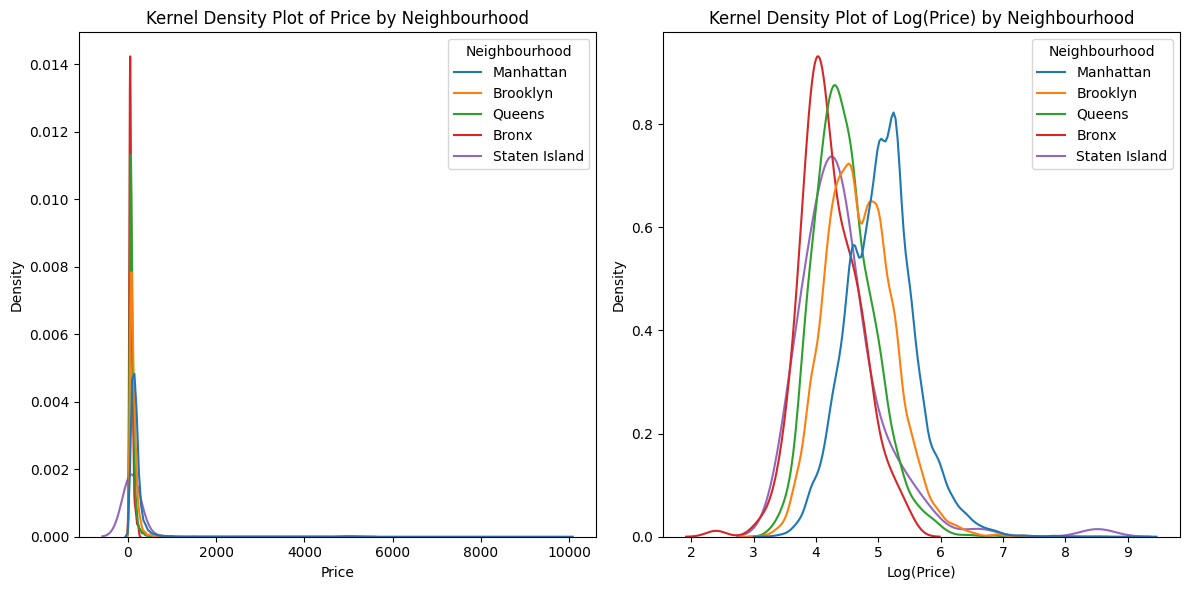

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Q1_clean.csv')

data = data.rename(columns={'Neighbourhood ': 'Neighbourhood'})

# Group by Neighbourhood and calculate mean Price and Review Scores Rating
average_prices_scores = data.groupby('Neighbourhood').agg(
    Average_Price=('Price', 'mean'),
    Average_Review_Score=('Review Scores Rating', 'mean')
).reset_index()

# Find the borough with the highest average price
most_expensive_borough = average_prices_scores.loc[average_prices_scores['Average_Price'].idxmax()]

print("Most expensive borough:")
print(most_expensive_borough)

# 2. Kernel density plot for Price and log(Price), grouped by Neighbourhood
plt.figure(figsize=(12, 6))

# Plot for Price
plt.subplot(1, 2, 1)
sns.kdeplot(data=data, x="Price", hue="Neighbourhood", common_norm=False)
plt.title('Kernel Density Plot of Price by Neighbourhood')
plt.xlabel('Price')
plt.ylabel('Density')

# Plot for log(Price)
plt.subplot(1, 2, 2)
data['Log_Price'] = np.log(data['Price'] + 1)  # Add 1 to avoid log(0) issues
sns.kdeplot(data=data, x="Log_Price", hue="Neighbourhood", common_norm=False)
plt.title('Kernel Density Plot of Log(Price) by Neighbourhood')
plt.xlabel('Log(Price)')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [12]:
import statsmodels.api as sm
X = pd.get_dummies(data['Neighbourhood'], drop_first=False)

y = data['Price']


model = sm.OLS(y, X).fit()
print(model.summary())

# Compare the coefficients from the regression to the table of average prices
average_prices = data.groupby('Neighbourhood')['Price'].mean()
print("\nAverage prices by Neighbourhood from the table:")
print(average_prices)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          4.43e-226
Time:                        19:07:14   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628

In [27]:
import statsmodels.api as sm

data = pd.read_csv('Q1_clean.csv')

data = data.rename(columns={'Neighbourhood ': 'Neighbourhood'})
# Part 3: Regression of Price on Neighbourhood (with dummies, including intercept)
X_with_intercept = pd.get_dummies(data['Neighbourhood'], drop_first=True)  # Drop the first category to avoid multicollinearity
X_with_intercept = sm.add_constant(X_with_intercept)  # Add intercept

# Fit the OLS model with intercept
model_with_intercept = sm.OLS(data['Price'], X_with_intercept).fit()

# Display the model summary
print(model_with_intercept.summary())


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Part 4: Split the sample 80/20 into a training and test set
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Define the independent variables (Neighbourhood and Review Scores Rating)
X_train = pd.get_dummies(train_data[['Neighbourhood', 'Review Scores Rating']], drop_first=True)
X_test = pd.get_dummies(test_data[['Neighbourhood', 'Review Scores Rating']], drop_first=True)

# Align columns to make sure they match after encoding
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Define the dependent variable (Price)
y_train = train_data['Price']
y_test = test_data['Price']

# Fit the regression model
model_train = sm.OLS(y_train, X_train).fit()

# Predict on the test set
y_pred = model_train.predict(X_test)

# Calculate R-squared and RMSE on the test set
r_squared = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Extract the coefficient for Review Scores Rating
review_score_coef = model_train.params['Review Scores Rating']

# Display the results
print(f"R-squared: {r_squared}")
print(f"RMSE: {rmse}")
print(f"Coefficient for Review Scores Rating: {review_score_coef}")


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

**Q2.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q3.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q4.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{alignat*}{3}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{alignat*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{alignat*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

which can be written in terms of sample covariance and sample variance as:

\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{alignat*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)

**Q5.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?